In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
training_data = pd.read_csv(r"C:\Users\TOBI\Desktop\datascience\DSN hack 2020\Train.csv")
testing_data = pd.read_csv(r"C:\Users\TOBI\Desktop\datascience\DSN hack 2020\Test.csv")

In [3]:
print(training_data.head())
print(testing_data.head())

    Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.7116

In [4]:
#training_data.info()

# Data Exploration 

In [5]:
training_data.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,167.754000,137.496750,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,645.450000,255.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08


In [6]:
print('The number of rows in train dataset is - ' , training_data.shape[0])
print('The number of columns in train dataset is - ' , training_data.shape[1])

The number of rows in train dataset is -  56000
The number of columns in train dataset is -  52


In [7]:
print('The number of rows in test dataset is - ' , testing_data.shape[0])
print('The number of columns in test dataset is - ' , testing_data.shape[1])

The number of rows in test dataset is -  24000
The number of columns in test dataset is -  51


In [8]:
''' #               MISSING DATA '''
#checking missing values percentage
training_data_na = (training_data.isnull().sum() / len(training_data)) * 100
training_data_na = training_data_na.drop(training_data_na[training_data_na ==0].index).sort_values(ascending=False)
missing_data1 = pd.DataFrame({'Missing Ratio' :training_data_na})
#print('training_data missing_data in percent: \n', missing_data1)

In [9]:
''' #               MISSING DATA '''
#checking missing values percentage
testing_data_na = (testing_data.isnull().sum() / len(testing_data)) * 100
testing_data_na = testing_data_na.drop(testing_data_na[testing_data_na ==0].index).sort_values(ascending=False)
missing_data2 = pd.DataFrame({'Missing Ratio' :testing_data_na})
print('testing_data missing_data in percent: \n', missing_data2)

testing_data missing_data in percent: 
               Missing Ratio
form_field40      78.450000
form_field31      70.041667
form_field41      68.120833
form_field45      56.408333
form_field11      55.825000
form_field23      50.520833
form_field30      45.450000
form_field35      41.108333
form_field15      39.966667
form_field48      37.175000
form_field22      36.350000
form_field46      28.687500
form_field21      27.945833
form_field24      23.354167
form_field8       23.350000
form_field6       23.350000
form_field16      22.808333
form_field50      19.987500
form_field17      19.562500
form_field18      18.204167
form_field12      17.429167
form_field27      16.291667
form_field9       14.166667
form_field26      13.216667
form_field13      10.262500
form_field44       9.841667
form_field25       9.400000
form_field37       9.400000
form_field32       9.400000
form_field7        9.295833
form_field39       7.620833
form_field2        7.120833
form_field1        4.625000
form_fie

#### removing features from training_data with missing values greater than 50 percent

In [10]:
training_data_na = (training_data.isnull().sum() / len(training_data)) * 100
#training_data_na = training_data_na.drop(training_data_na[training_data_na >50].index).sort_values(ascending=False)
miss_f = training_data_na[training_data_na>50].index
missing_data1 = pd.DataFrame({'Missing Ratio' :miss_f})
print('training_data columns with 50% missing_values: \n', missing_data1)

training_data columns with 50% missing_values: 
   Missing Ratio
0  form_field11
1  form_field23
2  form_field31
3  form_field40
4  form_field41
5  form_field45


In [11]:
testing_data_na = (testing_data.isnull().sum() / len(testing_data)) * 100
#training_data_na = training_data_na.drop(training_data_na[training_data_na >50].index).sort_values(ascending=False)
miss_f2 = testing_data_na[testing_data_na>50].index
missing_data2 = pd.DataFrame({'Missing Ratio' :miss_f2})
print('testing_data columns with 50% missing_values: \n', missing_data2)

testing_data columns with 50% missing_values: 
   Missing Ratio
0  form_field11
1  form_field23
2  form_field31
3  form_field40
4  form_field41
5  form_field45


In [12]:
#training_data = training_data.drop(["form_field40","form_field31","form_field41","form_field11","form_field45","form_field23"],axis=1, inplace=True)
training_data = training_data.drop(miss_f, axis=1)#, inplace=True)

In [13]:
testing_data = testing_data.drop(miss_f, axis=1)#, inplace=True)

In [14]:
print(training_data.shape)
print(testing_data.shape)

(56000, 46)
(24000, 45)


### looking into each other columns with missing values too

In [15]:
#print(training_data.columns)
#print(testing_data.columns)

### filling all missing values with the mean of their columns

In [16]:
training_data = training_data.fillna(training_data.mean())
testing_data = testing_data.fillna(testing_data.mean())

In [17]:
#checking missing values percentage
training_data_na = (training_data.isnull().sum() / len(training_data)) * 100
training_data_na = training_data_na.drop(training_data_na[training_data_na ==0].index).sort_values(ascending=False)
missing_data1 = pd.DataFrame({'Missing Ratio' :training_data_na})
print('training_data missing_data in percent: \n', missing_data1)

training_data missing_data in percent: 
 Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [18]:
#checking missing values percentage
testing_data_na = (testing_data.isnull().sum() / len(testing_data)) * 100
testing_data_na = testing_data_na.drop(testing_data_na[testing_data_na ==0].index).sort_values(ascending=False)
missing_data2 = pd.DataFrame({'Missing Ratio' :testing_data_na})
print('training_data missing_data in percent: \n', missing_data2)

training_data missing_data in percent: 
 Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [19]:
#Extracting categorical features
categorical_features = training_data.select_dtypes(include=[object])
print('columns of categorical_features.columns',categorical_features.columns)
#print(categorical_features.describe())

columns of categorical_features.columns Index(['Applicant_ID', 'form_field47', 'default_status'], dtype='object')


In [20]:
#Extracting categorical features
categorical_features2 = testing_data.select_dtypes(include=[object])
print('columns of categorical_features2.columns',categorical_features2.columns)
#print(categorical_features2.describe())

columns of categorical_features2.columns Index(['Applicant_ID', 'form_field47'], dtype='object')


### converting the categorical features to numeric using get dummies

In [21]:
training_data["form_field47"]= pd.get_dummies(training_data['form_field47'],drop_first=True)
training_data["default_status"]= pd.get_dummies(training_data['default_status'],drop_first=True)

testing_data["form_field47"]= pd.get_dummies(testing_data['form_field47'],drop_first=True)

In [22]:
training_data

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.000000,10689720.0,2.520720e+05,4.272776e+06,...,0.0,0.392854,2.02,0.711632,0.000000,0,305244.932775,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.000000,898979.0,4.975310e+05,9.073814e+06,...,0.0,0.314281,8.08,0.183584,0.000000,0,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,624447.924437,956940.0,2.626690e+06,1.929440e+05,...,0.0,0.162965,18.18,0.791136,0.000000,0,305244.932775,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.000000,3044703.0,3.854990e+05,3.986472e+06,...,1.0,0.488884,2.02,0.685168,0.000000,0,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.000000,214728.0,2.147280e+05,1.284089e+06,...,0.0,0.275000,12.12,0.438168,0.000000,0,97.887502,1.427891,0.045630,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.000000,9637475.0,4.047934e+06,1.164199e+07,...,0.0,0.000000,9.09,0.730040,0.000000,1,591.048913,0.000000,0.241598,0
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,624447.924437,927765.0,2.626690e+06,1.316002e+07,...,0.0,0.297913,30.30,0.498208,0.000000,1,305244.932775,0.000000,600586.172883,1
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.000000,3662435.0,3.662435e+06,3.585024e+06,...,0.0,0.550000,3.03,0.450512,0.000000,1,1252.474467,2.000000,0.163153,0
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,624447.924437,3458599.0,2.626690e+06,1.155330e+05,...,1.0,0.942854,0.00,0.705048,0.000000,0,305244.932775,0.000000,0.002997,0


In [23]:
testing_data

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field38,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.000000,0.34875,10.2006,0.0000,0.0000,4.185640e+05,4.185640e+05,4.185640e+05,5.407100e+05,...,14.0,0.000000,0.825000,1.01,0.800000,0.000000,0,301544.001781,0.000000,0.011221
1,Apcnt_1000048,3284.000000,1.27360,2.9606,9.0198,0.0000,0.000000e+00,9.858816e+06,4.901400e+04,1.510098e+06,...,14.0,2.000000,0.507694,4.04,0.623248,0.000000,1,301544.001781,0.504974,0.043525
2,Apcnt_1000052,3492.284404,0.27505,0.0600,0.0000,0.0000,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,...,0.0,0.090749,0.369684,0.00,0.566219,0.097926,0,301544.001781,0.000000,674984.349339
3,Apcnt_1000076,3232.000000,0.28505,2.8032,0.0000,0.0000,0.000000e+00,4.738020e+05,4.738020e+05,1.724437e+06,...,26.0,0.000000,0.916663,2.02,0.464224,0.097926,0,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.000000,2.09545,0.8318,2.5182,0.0000,1.983900e+04,1.150662e+06,1.150662e+06,7.860523e+06,...,20.0,0.000000,0.234047,23.23,0.726688,0.000000,1,1303.587148,1.637733,0.163124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Apcnt_999940,3258.000000,0.37925,0.5698,5.1282,0.0000,6.263036e+05,2.280318e+06,2.654142e+06,1.350593e+07,...,6.0,0.000000,1.100000,0.00,0.800000,1.000000,0,301544.001781,0.000000,674984.349339
23996,Apcnt_999956,3514.000000,0.95260,0.0000,0.0000,0.0000,1.494538e+06,4.773419e+06,4.773419e+06,8.971857e+07,...,8.0,0.000000,0.000000,12.12,0.196400,0.000000,0,4200.072959,3.000000,0.930931
23997,Apcnt_999976,3302.000000,0.05755,4.2394,0.0000,25.4376,6.263036e+05,4.940300e+04,2.654142e+06,1.350593e+07,...,2.0,0.000000,1.100000,1.01,0.800000,0.000000,0,301544.001781,4.855060,674984.349339
23998,Apcnt_999984,3334.000000,0.75670,1.4428,0.0000,0.0000,0.000000e+00,2.513329e+06,3.773300e+04,3.936680e+05,...,4.0,0.000000,0.440000,2.02,0.519776,0.000000,0,27.325129,0.818733,0.023749


### dropping the target feature and applicant id from the training data set

In [24]:
train_target = training_data["default_status"]
training_dat = training_data.drop(["Applicant_ID","default_status"],axis=1)

test_applicant_ID = testing_data["Applicant_ID"]
testing_data = testing_data.drop(["Applicant_ID"],axis=1)

In [25]:
train_target.value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [26]:
print(training_dat.shape)
print(testing_data.shape)

(56000, 44)
(24000, 44)


### some visualization

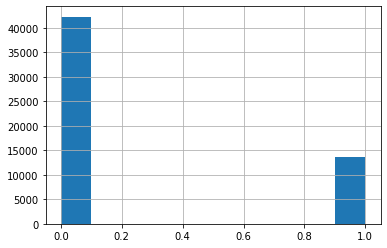

In [27]:
train_target.hist()

In [28]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

### Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#print("Top Absolute Correlations")
#print(get_top_abs_correlations(training_dat, 40))

In [29]:
from sklearn.model_selection import train_test_split
seed = 14
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(training_dat, train_target, test_size=test_size, random_state=seed)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

# Model Implementation

We will be looking at following Algorithms 

logistic regression 
Naive Bayes
Stochastic Gradient Descent
KNearest Neighbours
Decision Tree
Random Forest
Support vector machine 

**Ensmble models**

5.Random Forest classifier

6.Gradient Boosting classifier

7.ExtraTrees classifier

**Neural Network**

8.Multi Layer Preceptron Regressor


In [31]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [32]:
models = [
           # ['LinearRegression:',LogisticRegression()],
           # ['SGDClassifier: ', SGDClassifier()],
         # ['GaussianNB: ', GaussianNB()],
          # ['KNeighboursClassifier: ',  KNeighborsClassifier()],
          # ['SVC:' , SVC(kernel='rbf')],
          #['RandomForest ',RandomForestClassifier()],
           #['ExtraTreesClassifier :',ExtraTreesClassifier()],
           #['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           #['XGBClassifier: ', xgb.XGBClassifier()] ,
           #['MLPClassifier: ', MLPClassifier(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [33]:
import time
from math import sqrt
#from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

#### Run all the proposed models and update the information in a list model_data

#print(confusion_matrix(y_test, y_xg2))


model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train_n,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    #curr_model_data["accuracy_score"] = accuracy_score(train_y,curr_model.predict(train_X))
    curr_model_data["accuracy_score"] = accuracy_score(y_test,curr_model.predict(X_test_n))
    curr_model_data["precision_score"] = precision_score(y_test,curr_model.predict(X_test_n))
    curr_model_data["recall_score"] = recall_score(y_test, curr_model.predict(X_test_n))
    curr_model_data["f1_score"] = f1_score(y_test, curr_model.predict(X_test_n))
    model_data.append(curr_model_data)

In [34]:
#print(model_data)

# Convert list to dataframe
#df = pd.DataFrame(model_data)

#print(df)

In [35]:
#df.plot(x="Name", y=['accuracy_score' , 'precision_score' , 'recall_score','f1_score'], kind="bar" , title = 'models Results' , figsize= (10,8)) ;

### Obervations

1. Best results over test set are given by GradientBoostingClassifier with accuracy = 80.9% and f1 score = 0.519.
2. second best result is given by XGBClassifier with accuaracy = 80.1% and f1 score = 0.524
3. third best result is given by MLPClassifier with accuaracy = 80.3% and f1 score = 0.525

In [36]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier



param_test = {
  'min_child_weight':[4,5,6],
  #'max_depth': [6,7,8],
    #'n_estimators':[60],
    #'scale_pos_weight':[2,3,4,5],
    #'colsample_bytree':[0.5,0.6,0.7,0.8] 
  #'subsample':[0.5,0.6],
  #'gamma':[0,0.1,0.2,0.3]
    
}
gsearch2b3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=60, max_depth=7,
 min_child_weight=5, gamma=0.1,reg_alpha=1, subsample=0.5, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=2,seed=14), 
 param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch2b3.fit(X_train_n, y_train)
#print(gsearch2b3.grid_scores_)

print("gsearch2b.best_params_",gsearch2b3.best_params_)
print("gsearch2b.best_score_",gsearch2b3.best_score_)

#### best parameters gotten from xgb grid search cv5

gsearch2b.best_params_ {'max_depth': 7, 'n_estimators': 50}
gsearch2b.best_score_ 0.5977465678301164

gsearch2b.best_params_ {'min_child_weight': 5, 'subsample': 0.5}
gsearch2b.best_score_ 0.5995501055159679

gsearch2b.best_params_ {'colsample_bytree': 0.8, 'scale_pos_weight': 2}
gsearch2b.best_score_ 0.5974793062935356

gsearch2b.best_params_ {'gamma': 0.1}
gsearch2b.best_score_ 0.5977416292469645

In [45]:
#XGBClassifier,
Xgb_model = XGBClassifier( learning_rate=0.1, n_estimators=60, max_depth=7,
 min_child_weight=5, gamma=0.1,reg_alpha=1, subsample=0.5, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=2,seed=14)

In [ ]:
Xgb_model.fit(X_train_n, y_train)

In [ ]:
y_xg2 = Xgb_model.predict(X_test_n)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_xg2))
predictions = [value for value in y_xg2]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
#print("roc_auc test set", roc_auc_score(y_test, Xgb_model.predict_proba(X_test)[:,1]))
#print("roc_auc training set", roc_auc_score(y_train, Xgb_model.predict_proba(X_train)[:,1]))

### training the whole normalized dataset

In [ ]:
training_dat_n = scaler.fit_transform(training_dat)
testing_data_n = scaler.transform(testing_data)

In [ ]:
Xgb_model.fit(training_dat_n,train_target)

In [ ]:
final_pred = Xgb_model.predict(testing_data_n)
final_defaulter_pred = pd.DataFrame(final_pred, columns=['default_status'], index=test_applicant_ID)
print(final_defaulter_pred)

In [ ]:
#final_defaulter_pred.to_csv('default_status sub 1.csv') #xgbclassifier